In [14]:
%matplotlib inline
#import numpy as np
#print np.__version__
import numpy as np
print(np.__version__)

1.13.3


In [15]:
import sklearn
print(sklearn.__version__)

0.19.1


In [16]:
from scipy import sparse
Z = np.random.random((10, 5))
Z[Z < 0.7] = 0
Z

array([[ 0.        ,  0.84062499,  0.        ,  0.        ,  0.        ],
       [ 0.75519316,  0.        ,  0.        ,  0.        ,  0.88733872],
       [ 0.98985499,  0.        ,  0.        ,  0.82729676,  0.77829412],
       [ 0.90574416,  0.        ,  0.        ,  0.        ,  0.73386721],
       [ 0.        ,  0.73629652,  0.        ,  0.        ,  0.        ],
       [ 0.83173248,  0.        ,  0.        ,  0.        ,  0.82562222],
       [ 0.        ,  0.        ,  0.77096245,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.93854001],
       [ 0.        ,  0.        ,  0.99643269,  0.        ,  0.        ],
       [ 0.        ,  0.76310134,  0.        ,  0.        ,  0.        ]])

In [20]:
Z_csr = sparse.csr_matrix(Z)
print(Z_csr)

  (0, 0)	0.707986458804
  (0, 1)	0.786015968569
  (0, 2)	0.852491818533
  (1, 2)	0.872196090008
  (2, 1)	0.988124876083
  (3, 4)	0.742718326931
  (4, 0)	0.882352558046
  (5, 0)	0.711508454641
  (5, 2)	0.782924228547
  (5, 4)	0.809016183795
  (8, 0)	0.803332552724
  (8, 3)	0.771162380167
  (9, 1)	0.738464226279


In [22]:
Z_csr.toarray()

array([[ 0.70798646,  0.78601597,  0.85249182,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.87219609,  0.        ,  0.        ],
       [ 0.        ,  0.98812488,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.74271833],
       [ 0.88235256,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.71150845,  0.        ,  0.78292423,  0.        ,  0.80901618],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.80333255,  0.        ,  0.        ,  0.77116238,  0.        ],
       [ 0.        ,  0.73846423,  0.        ,  0.        ,  0.        ]])

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [28]:
n_samples, n_features = iris.data.shape
print(n_samples,n_features)
print(iris.feature_names)

150 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

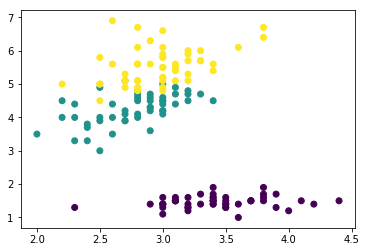

In [43]:
x_index = 1
y_index = 2
#针对特征维度绘图
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c = iris.target)
plt.xlabel = (iris.feature_names[x_index])
plt.ylabel = (iris.feature_names[y_index])

In [46]:
#载入手写图片数据集
from sklearn.datasets import load_digits
digits=load_digits()

In [49]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [51]:
#1797张 8 * 8图片
digits.images.shape

(1797, 8, 8)

In [54]:
n_samples, n_feature = digits.data.shape
print(n_samples, n_feature)

1797 64


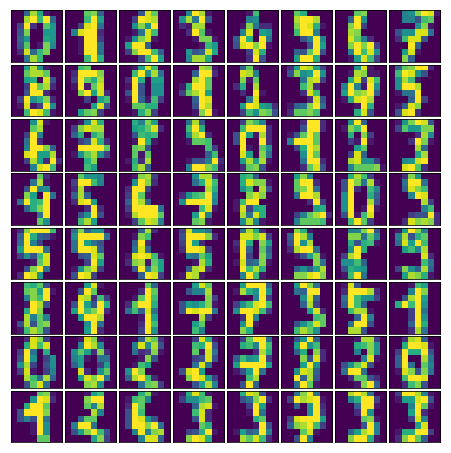

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (6, 6))
#调整子图大小
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i])

In [58]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
digits.target.shape

(1797,)

In [61]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

分类

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

from sklearn.linear_model import LogisticRegression
#实例化模型
clf = LogisticRegression()
clf.fit(iris.data, iris.target)
clf.predict_proba(iris.data)


probas = clf.predict_proba(iris.data)
print(type(probas))

from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(iris.data, iris.target)

predicted=clf.predict(iris.data)
predicted2=clf2.predict(iris.data)
from sklearn.metrics import accuracy_score
print(accuracy_score(iris.target, predicted), accuracy_score(iris.target, predicted2))

<class 'numpy.ndarray'>
0.96 0.986666666667


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True)
pca.fit(iris.data)

#输出主成分及其线性组合
print(pca.components_)

#输出主成分对应的表达能力
print(pca.explained_variance_ratio_)

#比较降维前后的维度
X_pca = pca.transform(iris.data)
print(iris.data.shape, '\n', X_pca.shape)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
[ 0.92461621  0.05301557]
(150, 4) 
 (150, 2)


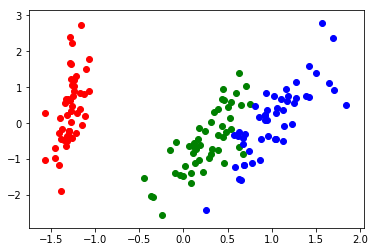

In [22]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c = c, label = label)
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Text(0.5,1,'kmeans labels')

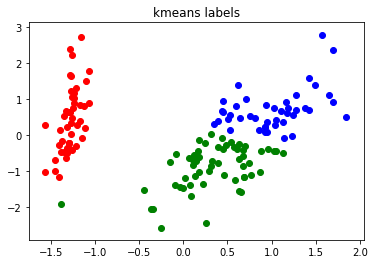

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_pca)
kmeans.labels_

plot_PCA_2D(X_pca, kmeans.labels_,['c0','c1','c2'])
plt.title('kmeans labels')